In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import decomposition

from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
from scipy.stats import kruskal

In [60]:
customers = pd.read_csv("olist_customers_dataset.csv")
geolocation = pd.read_csv("olist_geolocation_dataset.csv")
items = pd.read_csv("olist_order_items_dataset.csv")
payments = pd.read_csv("olist_order_payments_dataset.csv")
reviews = pd.read_csv("olist_order_reviews_dataset.csv")
orders = pd.read_csv("olist_orders_dataset.csv")
products = pd.read_csv("olist_products_dataset.csv")
sellers = pd.read_csv("olist_sellers_dataset.csv")
category_name = pd.read_csv("product_category_name_translation.csv")

In [61]:

def analyse(df):

    #shape 
    print("Shape du dataframe : ", df.shape)

    #les informations sur les colonnes
    print("\nInformations sur les colonnes : ")
    print(df.info())

    #le nombre de valeurs manquantes par colonne
    print("\nNombre de valeurs manquantes par colonne : ")
    print(df.isnull().sum())

    #les statistiques descriptives pour les colonnes numériques
    num_cols = df.select_dtypes(include=['number']).columns
    if len(num_cols) > 0:
        print("\nStatistiques descriptives pour les colonnes numériques : ")
        print(df[num_cols].describe())
    else:
        print("\nLe dataframe ne contient pas de colonnes numériques.")

    #les valeurs uniques pour les colonnes catégorielles
    print("\nValeurs uniques pour les colonnes catégorielles : ")
    print(df.describe(include='object').transpose())


    
    return None

In [62]:
analyse(customers)
customers.head(1)

Shape du dataframe :  (99441, 5)

Informations sur les colonnes : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None

Nombre de valeurs manquantes par colonne : 
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Statistiques descriptives pour les colonnes numériques : 
       customer_zip_code_prefix
count              99441.000000
mean               35137.474583
std                29797.9389

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP


In [63]:
#variable interrressante : customer_unique_id

In [64]:
analyse(geolocation)
geolocation.head(1)

Shape du dataframe :  (1000163, 5)

Informations sur les colonnes : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
None

Nombre de valeurs manquantes par colonne : 
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Statistiques descriptives pour les colonnes numériques : 
       geolocation_zip_code_prefix  geolocation_l

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP


In [65]:
#variable interrressante :  geolocation_zip_code_prefix

In [66]:
analyse(items)
items.head(1)


Shape du dataframe :  (112650, 7)

Informations sur les colonnes : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None

Nombre de valeurs manquantes par colonne : 
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Statistiques descriptives pour les colonnes numériques : 
    

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29


In [67]:
#variable interrressante : order_id , product_id,seller_id

In [68]:
analyse(payments)
payments.head(1)

Shape du dataframe :  (103886, 5)

Informations sur les colonnes : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
None

Nombre de valeurs manquantes par colonne : 
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Statistiques descriptives pour les colonnes numériques : 
       payment_sequential  payment_installments  payment_value
count       103886.000000         103886.000000  103886.000000
mean             1

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33


In [69]:
#variable interressante :order_id

In [70]:
analyse(reviews)
reviews.head(1)

Shape du dataframe :  (99224, 7)

Informations sur les colonnes : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
None

Nombre de valeurs manquantes par colonne : 
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Sta

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59


In [71]:
#variable interressante :order_id, review_id

In [72]:
analyse(orders)
orders.head(1)

Shape du dataframe :  (99441, 8)

Informations sur les colonnes : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None

Nombre de valeurs manquantes par colonne : 
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp       

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00


In [73]:
#variable interressante :order_id

In [74]:
analyse(products)
products.head(1)

Shape du dataframe :  (32951, 9)

Informations sur les colonnes : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
None

Nombre de valeurs manquantes par colonne : 
product_id                      0
product_category_name         610
product_name_lenght         

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0


In [75]:
#variable interressante :product_id,product_category_name

In [76]:
analyse(sellers)
sellers.head(1)

Shape du dataframe :  (3095, 4)

Informations sur les colonnes : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
None

Nombre de valeurs manquantes par colonne : 
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Statistiques descriptives pour les colonnes numériques : 
       seller_zip_code_prefix
count             3095.000000
mean             32291.059451
std              32713.453830
min               1001.000000
25%               7093.500000
50%              14940.000000
75%              6455

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP


In [77]:
#variable interressante :seller_id

In [78]:
analyse(category_name)
category_name.head(1)

Shape du dataframe :  (71, 2)

Informations sur les colonnes : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
None

Nombre de valeurs manquantes par colonne : 
product_category_name            0
product_category_name_english    0
dtype: int64

Le dataframe ne contient pas de colonnes numériques.

Valeurs uniques pour les colonnes catégorielles : 
                              count unique            top freq
product_category_name            71     71   beleza_saude    1
product_category_name_english    71     71  health_beauty    1


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty


In [79]:
#variable interressante :product_category_name_english

In [80]:
# Fusionner les dataframes
df1 = pd.merge(customers, orders, on='customer_id')
df2 = pd.merge(df1, payments, on='order_id')
df3 = pd.merge(df2, reviews, on='order_id')
df4 = pd.merge(df3, items, on='order_id')
df5 = pd.merge(df4, products, on='product_id')
df6 = pd.merge(df5, sellers, on='seller_id')
df6 = pd.merge(df5, sellers, on='seller_id')

In [81]:
# Fusion des deux DataFrames horizontalement sur la colonne commune
df7 = pd.merge(df6, geolocation, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix')

# Suppression de la colonne commune
df7.drop(columns=['geolocation_zip_code_prefix'], inplace=True)


In [82]:
df7.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'order_item_id',
       'product_id', 'seller_id', 'shipping_limit_date', 'price',
       'freight_value', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'geolocation_lat', 'geolocation_lng', 'geolocation_city',
       'geolocation_state'],

In [83]:
df7[['order_item_id']].sum()

order_item_id    21584807
dtype: int64

In [84]:
 df7.isnull().sum()

customer_id                             0
customer_unique_id                      0
customer_zip_code_prefix                0
customer_city                           0
customer_state                          0
order_id                                0
order_status                            0
order_purchase_timestamp                0
order_approved_at                    2994
order_delivered_carrier_date       190511
order_delivered_customer_date      353660
order_estimated_delivery_date           0
payment_sequential                      0
payment_type                            0
payment_installments                    0
payment_value                           0
review_id                               0
review_score                            0
review_comment_title             15902843
review_comment_message           10522525
review_creation_date                    0
review_answer_timestamp                 0
order_item_id                           0
product_id                        

In [85]:
 df7.isnull().sum().sum()

28020689

In [173]:
df7

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,54,64,31,8577,itaquaquecetuba,SP,-21,-47,franca,SP
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,54,64,31,8577,itaquaquecetuba,SP,-20,-47,franca,SP
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,54,64,31,8577,itaquaquecetuba,SP,-21,-47,franca,SP
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,54,64,31,8577,itaquaquecetuba,SP,-20,-47,franca,SP
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,54,64,31,8577,itaquaquecetuba,SP,-21,-47,franca,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17920944,86025340edc60ca36327c4169f070f8e,132d0bbffd4ef7e3461c6fe4392b65ce,89642,tangara,SC,e9613fa6e02ff8ae45f37ca30b0468a1,delivered,2017-12-20 12:04:33,2017-12-20 12:17:28,2017-12-20 23:09:30,...,26,11,26,39442,janauba,MG,-27,-51,tangara,SC
17920945,86025340edc60ca36327c4169f070f8e,132d0bbffd4ef7e3461c6fe4392b65ce,89642,tangara,SC,e9613fa6e02ff8ae45f37ca30b0468a1,delivered,2017-12-20 12:04:33,2017-12-20 12:17:28,2017-12-20 23:09:30,...,26,11,26,39442,janauba,MG,-27,-51,tangara,SC
17920946,86025340edc60ca36327c4169f070f8e,132d0bbffd4ef7e3461c6fe4392b65ce,89642,tangara,SC,e9613fa6e02ff8ae45f37ca30b0468a1,delivered,2017-12-20 12:04:33,2017-12-20 12:17:28,2017-12-20 23:09:30,...,26,11,26,39442,janauba,MG,-27,-51,tangara,SC
17920947,86025340edc60ca36327c4169f070f8e,132d0bbffd4ef7e3461c6fe4392b65ce,89642,tangara,SC,e9613fa6e02ff8ae45f37ca30b0468a1,delivered,2017-12-20 12:04:33,2017-12-20 12:17:28,2017-12-20 23:09:30,...,26,11,26,39442,janauba,MG,-27,-51,tangará,SC


In [86]:
data = df7.drop(['customer_id','customer_zip_code_prefix','customer_city','order_status','order_approved_at','order_delivered_carrier_date', 'order_delivered_customer_date','order_estimated_delivery_date',  'review_id','review_comment_title', 'review_comment_message','review_creation_date', 'review_answer_timestamp','shipping_limit_date', 'price', 'freight_value', 'product_category_name', 'product_name_lenght',  'product_description_lenght', 'product_photos_qty','product_id', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm','seller_zip_code_prefix', 'seller_city', 'seller_state','seller_id',  'geolocation_lat', 'geolocation_lng', 'geolocation_city','geolocation_state','order_item_id'],axis = 1)

In [87]:
data

,customer_unique_id,customer_state,order_id,order_purchase_timestamp,payment_sequential,payment_type,payment_installments,payment_value,review_score
0,861eff4711a542e4b93843c6dd7febb0,SP,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,1,credit_card,2,146.87,4
1,861eff4711a542e4b93843c6dd7febb0,SP,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,1,credit_card,2,146.87,4
2,861eff4711a542e4b93843c6dd7febb0,SP,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,1,credit_card,2,146.87,4
3,861eff4711a542e4b93843c6dd7febb0,SP,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,1,credit_card,2,146.87,4
4,861eff4711a542e4b93843c6dd7febb0,SP,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,1,credit_card,2,146.87,4
...,...,...,...,...,...,...,...,...,...
17920944,132d0bbffd4ef7e3461c6fe4392b65ce,SC,e9613fa6e02ff8ae45f37ca30b0468a1,2017-12-20 12:04:33,1,credit_card,5,123.82,5
17920945,132d0bbffd4ef7e3461c6fe4392b65ce,SC,e9613fa6e02ff8ae45f37ca30b0468a1,2017-12-20 12:04:33,1,credit_card,5,123.82,5
17920946,132d0bbffd4ef7e3461c6fe4392b65ce,SC,e9613fa6e02ff8ae45f37ca30b0468a1,2017-12-20 12:04:33,1,credit_card,5,123.82,5
17920947,132d0bbffd4ef7e3461c6fe4392b65ce,SC,e9613fa6e02ff8ae45f37ca30b0468a1,2017-12-20 12:04:33,1,credit_card,5,123.82,5


In [88]:
 data.isnull().sum()

customer_unique_id          0
customer_state              0
order_id                    0
order_purchase_timestamp    0
payment_sequential          0
payment_type                0
payment_installments        0
payment_value               0
review_score                0
dtype: int64

In [89]:
data.duplicated().sum()

17818736

In [90]:
data['order_id'].nunique()

97643

In [91]:
nombrproduit = data.groupby(['customer_unique_id'])['order_id'].count().reset_index(name= 'produit total')


In [92]:
nombrproduit 

,customer_unique_id,produit total
0,0000366f3b9a7992bf8c76cfdf3221e2,66
1,0000b849f77a49e4a4ce2b2a4ca5be3f,144
2,0000f46a3911fa3c0805444483337064,117
3,0000f6ccb0745a6a4b88665a16c9f078,32
4,0004aac84e0df4da2b147fca70cf8255,133
...,...,...
94452,fffcf5a5ff07b0908bd4e2dbc735a684,28
94453,fffea47cd6d3cc0a88bd621562a9d061,72
94454,ffff371b4d645b6ecea244b27531430a,55
94455,ffff5962728ec6157033ef9805bacc48,40


In [93]:
nombrproduit['produit total'].sum()

17920949

In [94]:
data = pd.merge(nombrproduit, data,how = 'left', on=['customer_unique_id']).drop_duplicates().reset_index(drop=True)


In [95]:
data

,customer_unique_id,produit total,customer_state,order_id,order_purchase_timestamp,payment_sequential,payment_type,payment_installments,payment_value,review_score
0,0000366f3b9a7992bf8c76cfdf3221e2,66,SP,e22acc9c116caa3f2b7121bbb380d08e,2018-05-10 10:56:27,1,credit_card,8,141.90,5
1,0000b849f77a49e4a4ce2b2a4ca5be3f,144,SP,3594e05a005ac4d06a72673270ef9ec9,2018-05-07 11:11:27,1,credit_card,1,27.19,4
2,0000f46a3911fa3c0805444483337064,117,SC,b33ec3b699337181488304f362a6b734,2017-03-10 21:05:03,1,credit_card,8,86.22,3
3,0000f6ccb0745a6a4b88665a16c9f078,32,PA,41272756ecddd9a9ed0180413cc22fb6,2017-10-12 20:29:41,1,credit_card,4,43.62,4
4,0004aac84e0df4da2b147fca70cf8255,133,SP,d957021f1127559cd947b62533f484f7,2017-11-14 19:45:42,1,credit_card,6,196.89,5
...,...,...,...,...,...,...,...,...,...,...
102208,fffcf5a5ff07b0908bd4e2dbc735a684,28,PE,725cf8e9c24e679a8a5a32cb92c9ce1e,2017-06-08 21:00:36,1,credit_card,10,2067.42,5
102209,fffea47cd6d3cc0a88bd621562a9d061,72,BA,c71b9252fd7b3b263aaa4cb09319a323,2017-12-10 20:07:56,1,credit_card,1,84.58,4
102210,ffff371b4d645b6ecea244b27531430a,55,MT,fdc45e6c7555e6cb3cc0daca2557dbe1,2017-02-07 15:49:16,1,credit_card,1,112.46,5
102211,ffff5962728ec6157033ef9805bacc48,40,ES,94d3ee0bc2a0af9d4fa47a4d63616e8d,2018-05-02 15:17:41,1,credit_card,5,133.69,5


In [110]:
dataagg = {"order_id": pd.Series.nunique,
           'order_purchase_timestamp' : 'max', 
           'payment_installments': 'max',
           'payment_value': 'sum',
           'review_score' : 'mean', 
           'customer_state' : lambda x: x.mode(),
           'payment_type' : lambda x: x.mode()[0],
           'produit total' : 'sum',
          }


In [111]:
data2 = data.groupby("customer_unique_id").agg(dataagg).reset_index()


In [112]:
data2

,customer_unique_id,order_id,order_purchase_timestamp,payment_installments,payment_value,review_score,customer_state,payment_type,produit total
0,0000366f3b9a7992bf8c76cfdf3221e2,1,2018-05-10 10:56:27,8,141.90,5.0,SP,credit_card,66
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,2018-05-07 11:11:27,1,27.19,4.0,SP,credit_card,144
2,0000f46a3911fa3c0805444483337064,1,2017-03-10 21:05:03,8,86.22,3.0,SC,credit_card,117
3,0000f6ccb0745a6a4b88665a16c9f078,1,2017-10-12 20:29:41,4,43.62,4.0,PA,credit_card,32
4,0004aac84e0df4da2b147fca70cf8255,1,2017-11-14 19:45:42,6,196.89,5.0,SP,credit_card,133
...,...,...,...,...,...,...,...,...,...
94452,fffcf5a5ff07b0908bd4e2dbc735a684,1,2017-06-08 21:00:36,10,2067.42,5.0,PE,credit_card,28
94453,fffea47cd6d3cc0a88bd621562a9d061,1,2017-12-10 20:07:56,1,84.58,4.0,BA,credit_card,72
94454,ffff371b4d645b6ecea244b27531430a,1,2017-02-07 15:49:16,1,112.46,5.0,MT,credit_card,55
94455,ffff5962728ec6157033ef9805bacc48,1,2018-05-02 15:17:41,5,133.69,5.0,ES,credit_card,40


In [113]:
data2.describe()

,order_id,payment_installments,payment_value,review_score,produit total
count,94457.000000,94457.000000,94457.000000,94457.000000,94457.000000
mean,1.033730,2.939507,166.056596,4.102462,247.621690
std,0.210529,2.721002,227.673566,1.326289,1536.951535
min,1.000000,0.000000,9.590000,1.000000,1.000000
25%,1.000000,1.000000,63.100000,4.000000,58.000000
50%,1.000000,2.000000,107.900000,5.000000,117.000000
75%,1.000000,4.000000,183.120000,5.000000,240.000000
max,16.000000,24.000000,13664.080000,5.000000,314325.000000


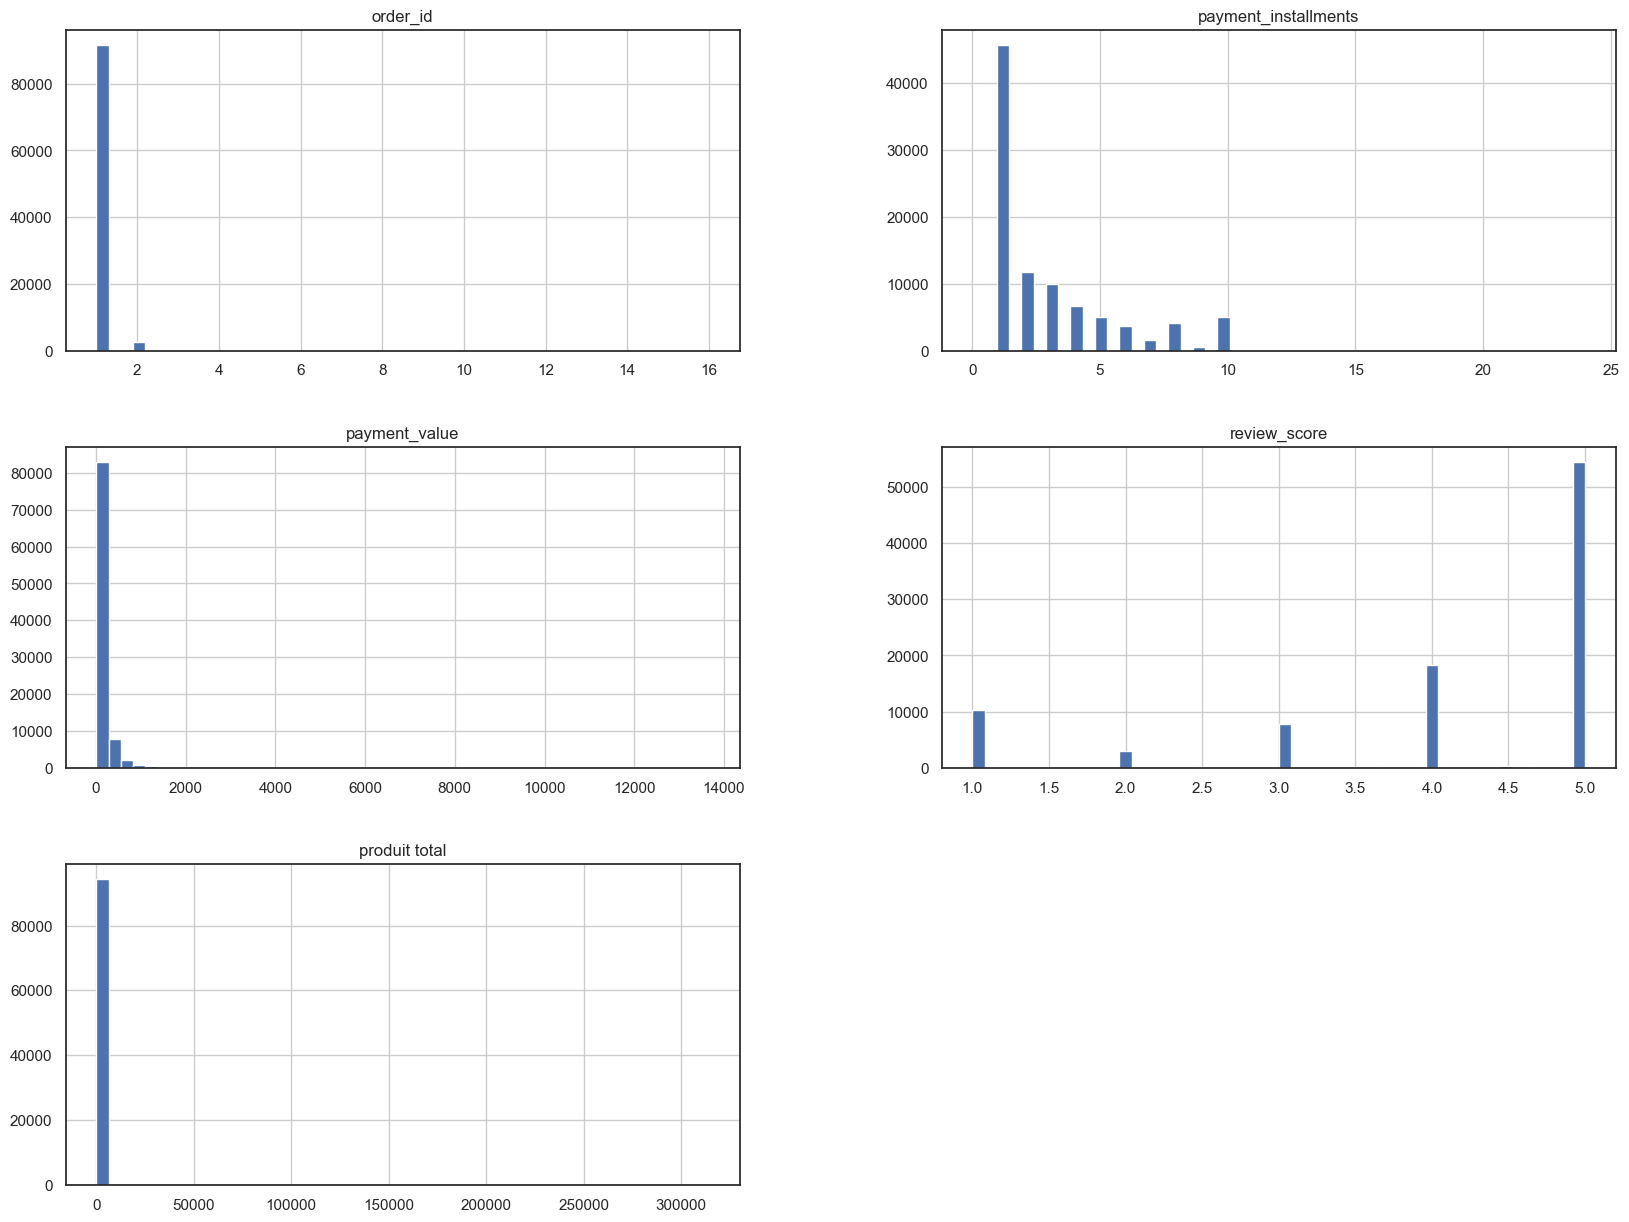

In [114]:
# Tracer l'histogramme de chaque colonne numérique
data2.hist(bins=50, figsize=(20,15))
plt.show()


C:\Users\boukh\AppData\Local\Temp\ipykernel_17360\3133563717.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_matrix, dtype=np.bool)


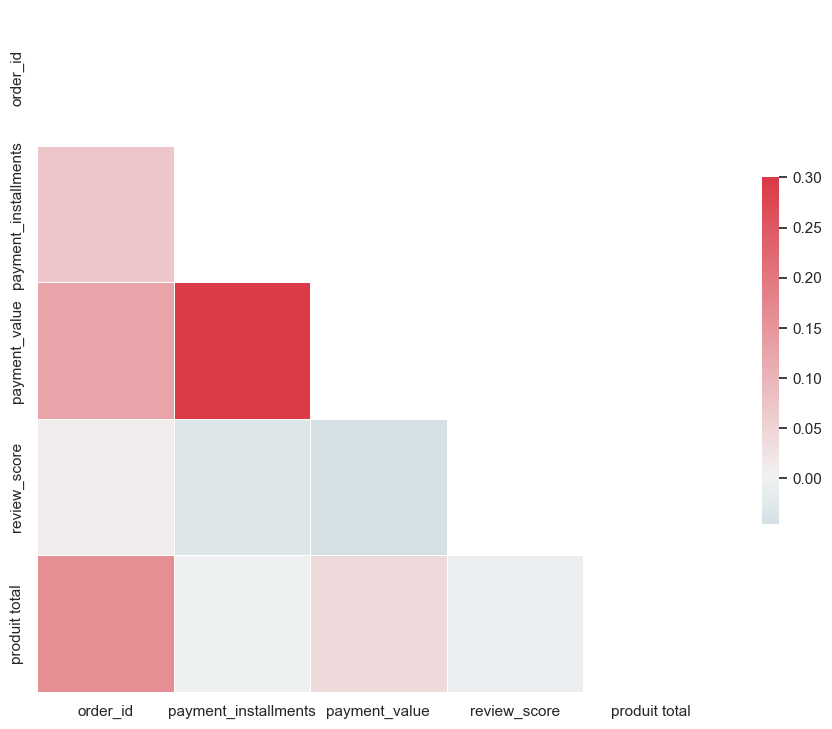

In [115]:
corr_matrix = data2.corr()
sns.set(style="white")
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

# Recence

In [116]:
# Convertir la colonne "order_purchase_timestamp" en type de données datetime
data2['order_purchase_timestamp'] = pd.to_datetime(data2['order_purchase_timestamp'])

# Calculer la date d'achat la plus récente dans le dataframe
latest_purchase_date = data2['order_purchase_timestamp'].max()

# Calculer la récence pour chaque achat en soustrayant la date d'achat la plus récente de la date d'achat pour chaque ligne
data2['recence'] = (latest_purchase_date - data2['order_purchase_timestamp']).dt.days

# Afficher les premières lignes du dataframe avec la colonne "recence"
data2

,customer_unique_id,order_id,order_purchase_timestamp,payment_installments,payment_value,review_score,customer_state,payment_type,produit total,recence
0,0000366f3b9a7992bf8c76cfdf3221e2,1,2018-05-10 10:56:27,8,141.90,5.0,SP,credit_card,66,115
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,2018-05-07 11:11:27,1,27.19,4.0,SP,credit_card,144,118
2,0000f46a3911fa3c0805444483337064,1,2017-03-10 21:05:03,8,86.22,3.0,SC,credit_card,117,541
3,0000f6ccb0745a6a4b88665a16c9f078,1,2017-10-12 20:29:41,4,43.62,4.0,PA,credit_card,32,325
4,0004aac84e0df4da2b147fca70cf8255,1,2017-11-14 19:45:42,6,196.89,5.0,SP,credit_card,133,292
...,...,...,...,...,...,...,...,...,...,...
94452,fffcf5a5ff07b0908bd4e2dbc735a684,1,2017-06-08 21:00:36,10,2067.42,5.0,PE,credit_card,28,451
94453,fffea47cd6d3cc0a88bd621562a9d061,1,2017-12-10 20:07:56,1,84.58,4.0,BA,credit_card,72,266
94454,ffff371b4d645b6ecea244b27531430a,1,2017-02-07 15:49:16,1,112.46,5.0,MT,credit_card,55,572
94455,ffff5962728ec6157033ef9805bacc48,1,2018-05-02 15:17:41,5,133.69,5.0,ES,credit_card,40,123


In [117]:
datatime = data2

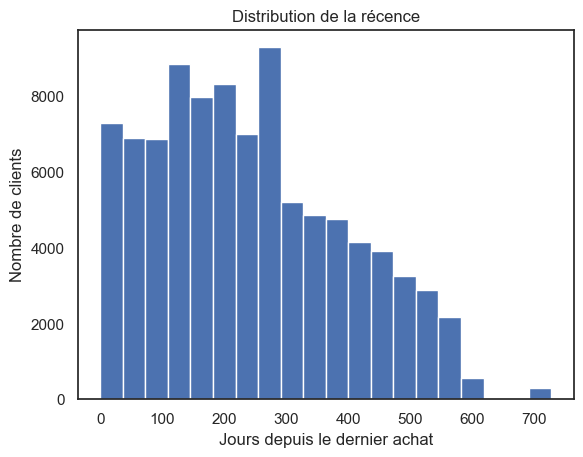

In [119]:
# Créer un histogramme de la récence avec 20 bins
plt.hist(data2['recence'], bins=20)

# Ajouter un titre et des labels d'axes
plt.title("Distribution de la récence")
plt.xlabel("Jours depuis le dernier achat")
plt.ylabel("Nombre de clients")

# Afficher le graphique
plt.show()


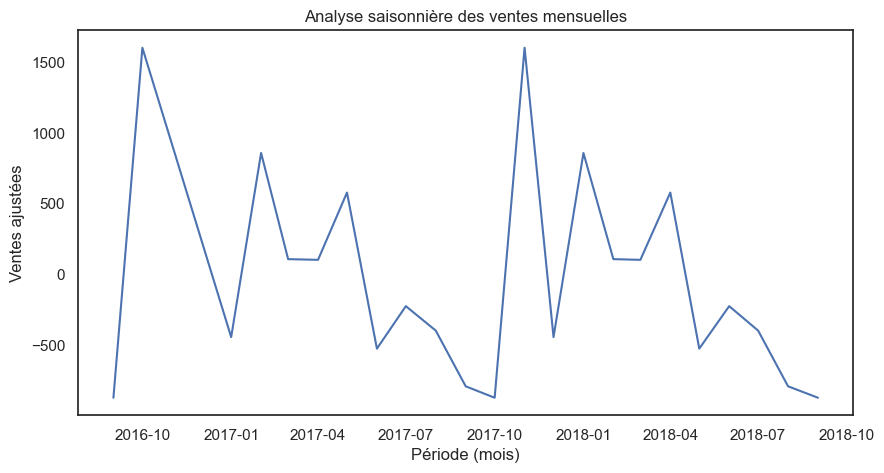

In [126]:
# Passage en mois
data2['month_col'] = data2['order_purchase_timestamp'].dt.to_period('M')
monthly_agg = data2.groupby('month_col').size()
monthly_agg.index = monthly_agg.index.astype('datetime64[ns]')

# Décomposition saisonnière avec une période de 6 mois
month_decomp_alt = seasonal_decompose(monthly_agg, model='additive', period=11)

# Visualisation
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=month_decomp_alt.seasonal, x=month_decomp_alt.seasonal.index, y=month_decomp_alt.seasonal, ax=ax)
ax.set_title('Analyse saisonnière des ventes mensuelles')
ax.set_xlabel('Période (mois)')
ax.set_ylabel('Ventes ajustées')
plt.show()


Seulement 23mois disponible, donc j'ai fais la saisonalité sur 11mois

- pic en octobre 2016 et novembre 2017
- baisse de vente de juillet a septembre

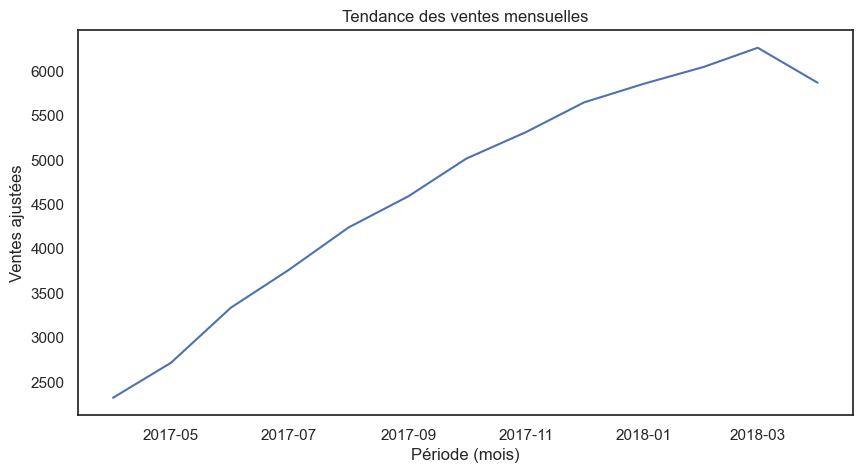

In [131]:
# Visualisation de la tendance des ventes
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=month_decomp_alt.trend, x=month_decomp_alt.trend.index, y=month_decomp_alt.trend, ax=ax)
ax.set_title('Tendance des ventes mensuelles')
ax.set_xlabel('Période (mois)')
ax.set_ylabel('Ventes ajustées')
plt.show()


Tendance croissante jusqu'au 03-2018

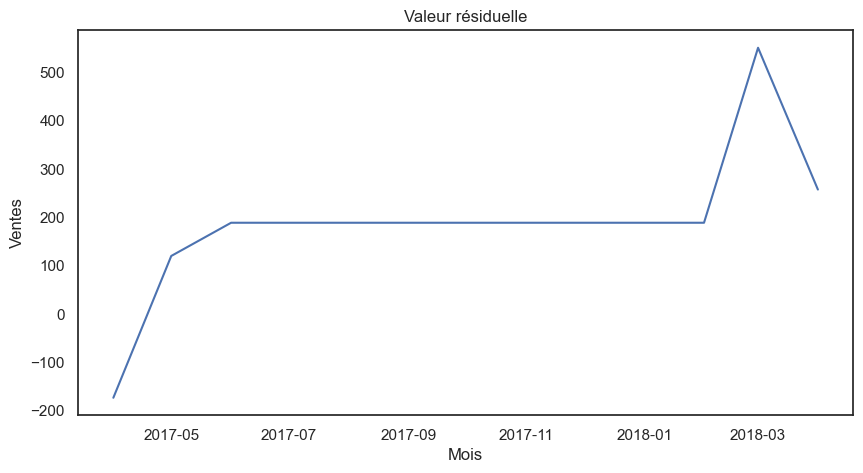

In [144]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=mois2.resid, x=mois2.resid.index, y=mois2.resid, ax=ax)
ax.set_title('Valeur résiduelle')
ax.set_xlabel('Mois')
ax.set_ylabel('Ventes')
plt.show()


- On peut constater une diminution des ventes à partir de mai 2017, ce qui pourrait être dû à une baisse de la demande ou à une forte concurrence.
- En revanche, on observe une hausse significative des ventes à partir de mars 2018, ce qui peut être lié à une augmentation de la demande ou à une stratégie marketing réussie.

# Frequence 


In [152]:
data2 = data2.rename(columns={'order_id': 'fréquence'})


In [153]:
data2

,customer_unique_id,fréquence,order_purchase_timestamp,payment_installments,payment_value,review_score,customer_state,payment_type,produit total,recence,month_col
0,0000366f3b9a7992bf8c76cfdf3221e2,1,2018-05-10 10:56:27,8,141.90,5.0,SP,credit_card,66,115,2018-05
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,2018-05-07 11:11:27,1,27.19,4.0,SP,credit_card,144,118,2018-05
2,0000f46a3911fa3c0805444483337064,1,2017-03-10 21:05:03,8,86.22,3.0,SC,credit_card,117,541,2017-03
3,0000f6ccb0745a6a4b88665a16c9f078,1,2017-10-12 20:29:41,4,43.62,4.0,PA,credit_card,32,325,2017-10
4,0004aac84e0df4da2b147fca70cf8255,1,2017-11-14 19:45:42,6,196.89,5.0,SP,credit_card,133,292,2017-11
...,...,...,...,...,...,...,...,...,...,...,...
94452,fffcf5a5ff07b0908bd4e2dbc735a684,1,2017-06-08 21:00:36,10,2067.42,5.0,PE,credit_card,28,451,2017-06
94453,fffea47cd6d3cc0a88bd621562a9d061,1,2017-12-10 20:07:56,1,84.58,4.0,BA,credit_card,72,266,2017-12
94454,ffff371b4d645b6ecea244b27531430a,1,2017-02-07 15:49:16,1,112.46,5.0,MT,credit_card,55,572,2017-02
94455,ffff5962728ec6157033ef9805bacc48,1,2018-05-02 15:17:41,5,133.69,5.0,ES,credit_card,40,123,2018-05


In [155]:
data2.fréquence.value_counts(normalize=True)


1     0.969722
2     0.027812
3     0.001959
4     0.000307
5     0.000095
6     0.000053
7     0.000032
9     0.000011
16    0.000011
Name: fréquence, dtype: float64

97% des clients ont fais seulement 1 seule commande.

In [162]:
data2[data2['fréquence'] > 6]


,customer_unique_id,fréquence,order_purchase_timestamp,payment_installments,payment_value,review_score,customer_state,payment_type,produit total,recence,month_col
10185,1b6c7548a2a1f9037c1fd3ddfed95f33,7,2018-02-14 13:22:12,1,959.01,5.000000,MG,boleto,2560,200,2018-02
23077,3e43e6105506432c953e165fb2acf44c,9,2018-02-27 18:36:39,10,1172.66,2.777778,SP,credit_card,45972,187,2018-02
37172,6469f99c1f9dfae7733b25662e7f1782,7,2018-06-28 00:43:34,6,758.83,5.000000,SP,credit_card,30177,67,2018-06
52090,8d50f5eadf50201ccdcedfb9e2ac8455,16,2018-08-20 19:14:26,3,902.04,5.000000,SP,credit_card,20992,13,2018-08
74797,ca77025e7201e3b30c44b472ff346268,7,2018-06-01 11:38:29,1,1122.72,5.000000,PE,credit_card,24276,93,2018-06


une personne a fait 9 commande et une autre personne a fait 16 commande. ce sont les meilleurs clients.

 # Montant des commandes

In [165]:
montant_commande = data2.groupby('fréquence')['payment_value'].sum()
montant_commande

fréquence
1     14774909.96
2       789398.76
3        83051.28
4        22696.91
5         6719.17
6         3516.57
7         2840.56
9         1172.66
16         902.04
Name: payment_value, dtype: float64

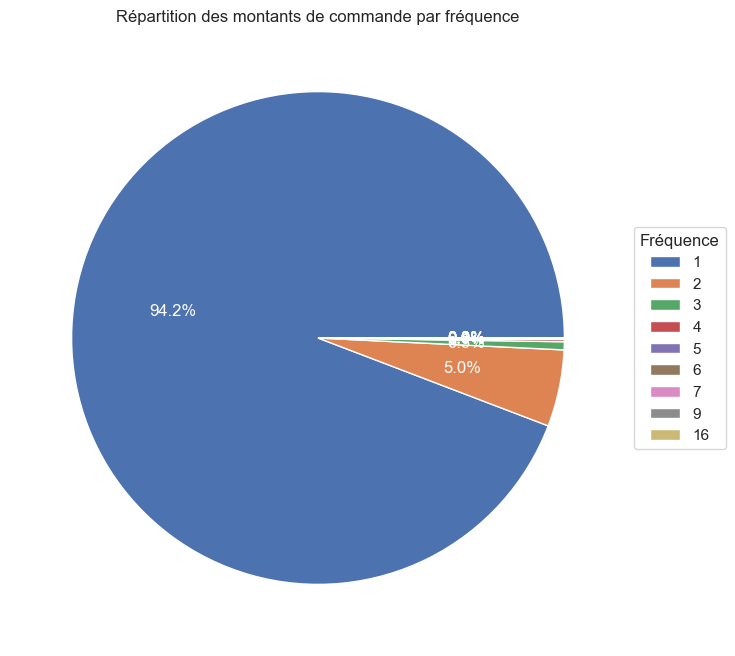

In [169]:
# Créer un diagramme circulaire
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(montant_commande, autopct='%1.1f%%', textprops=dict(color="w"))

# Ajouter une légende sur le côté
ax.legend(wedges, montant_commande.index,
          title="Fréquence",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

# Ajouter un titre
ax.set_title("Répartition des montants de commande par fréquence")

plt.show()

In [167]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)
montant_commande.describe()

count          9
mean     1742801
std      4893777
min          902
25%         2841
50%         6719
75%        83051
max     14774910
Name: payment_value, dtype: float64

# Satisfaction du client

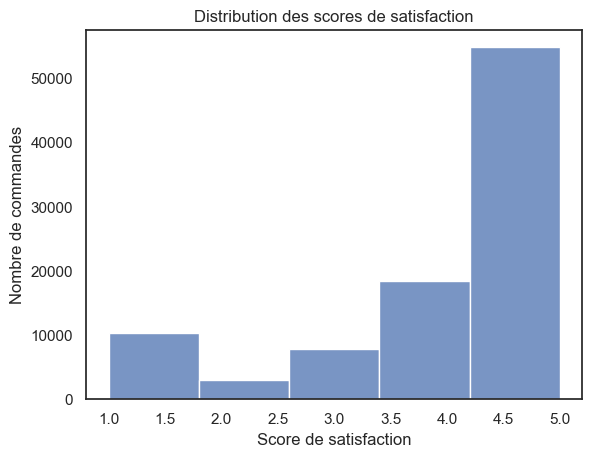

In [170]:


sns.histplot(data=data2, x='review_score', bins=5)
plt.xlabel('Score de satisfaction')
plt.ylabel('Nombre de commandes')
plt.title('Distribution des scores de satisfaction')
plt.show()


In [171]:
stats = data2['review_score'].describe()
print(stats)


count   94457
mean        4
std         1
min         1
25%         4
50%         5
75%         5
max         5
Name: review_score, dtype: float64


In [172]:
data2.to_csv("data_exploration.csv")